In [4]:
import importlib
import utils
importlib.reload(utils)
from utils import *
import files
importlib.reload(files)
from files import *
from sklearn.model_selection import train_test_split

In [5]:
for city, path in files.items():
      globals()[f"Text_{city}"] = extract_columns(files[city],1)

for city3, path3 in files3.items():
      globals()[f"hum_{city3}"] = extract_columns(files3[city3],3)  

for city4, path4 in files3.items():
      globals()[f"wind_{city4}"] = extract_columns(files3[city4],4)  

for city5, path5 in files3.items():
      globals()[f"solar_{city5}"] = extract_columns(files3[city5],5)  

for city6, path6 in files3.items():
      globals()[f"ground_{city6}"] = extract_columns(files3[city6],10)  

for city, path in files.items():
      globals()[f"Tint_{city}"] = extract_columns(files[city],2)
    
occupation=extract_columns("Occupancy_per_hour",1)  

In [6]:
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)
Wind_combined_tou=pd.concat([wind_agen, wind_albi,wind_auch,wind_toulouse], axis=0).reset_index(drop=True)
Solar_combined_tou=pd.concat([solar_agen, solar_albi,solar_auch,solar_toulouse], axis=0).reset_index(drop=True)
Ground_combined_tou=pd.concat([ground_agen, ground_albi,ground_auch,ground_toulouse], axis=0).reset_index(drop=True)
Solar_combined_zur=pd.concat([solar_Birmensdorf,solar_Taenikon,solar_Zurich_fluntern,solar_Zurich_kloten], axis=0).reset_index(drop=True)
Tint_combined_tou = pd.concat([Tint_agen, Tint_albi,Tint_auch,Tint_toulouse], axis=0).reset_index(drop=True)



In [142]:
occupation=extract_columns("Occupancy_per_hour",1)  

In [63]:
Text_conso_24_heat_tou=Text_combined_tou.copy()
Text_conso_24_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_24_heat_tou=pd.concat([Text_conso_24_heat_tou,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_conso_24_heat_tou.columns = Text_conso_24_heat_tou.columns.astype(str)
Text_conso_24_heat_tou=downsample_majority_class(Text_conso_24_heat_tou,'heat_on')



df = Text_conso_24_heat_tou.copy()
scaler_temp = StandardScaler() 
scaler_cons = StandardScaler()

df_scaled = np.hstack([
    scaler_temp.fit_transform(df.iloc[:, :24]),   
    df.iloc[:, 24:25].values,               
    scaler_cons.fit_transform(df.iloc[:, 25:]),  
])

df_final = pd.DataFrame(df_scaled, columns=df.columns)
data = df_final.values  
time_steps = 1  

X, y = [], []
for i in range(1,len(data) ):
    X.append(np.hstack([data[i-1, :], data[i, :24], data[i, 24:25]])) 
    y.append(data[i, 25:]) 
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape) 
print("Shape of y:", y.shape) 

X = X.reshape(X.shape[0], 1, X.shape[1]) 

X_train=X[:int((X.shape[0]*8)/10),:]
X_test=X[int((X.shape[0]*8)/10):,:]
y_train=y[:int((y.shape[0]*8)/10),:]
y_test=y[int((y.shape[0]*8)/10):,:]

Shape of X: (1273, 74)
Shape of y: (1273, 24)


In [584]:
X_test.shape

(146, 6, 74, 1)

Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.8683 - mae: 0.7432 - mse: 0.8683 - val_loss: 0.6594 - val_mae: 0.6481 - val_mse: 0.6594
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5558 - mae: 0.5661 - mse: 0.5558 - val_loss: 0.4421 - val_mae: 0.4257 - val_mse: 0.4421
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4008 - mae: 0.4008 - mse: 0.4008 - val_loss: 0.4400 - val_mae: 0.4043 - val_mse: 0.4400
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3880 - mae: 0.3931 - mse: 0.3880 - val_loss: 0.4520 - val_mae: 0.4099 - val_mse: 0.4520
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3828 - mae: 0.3986 - mse: 0.3828 - val_loss: 0.3933 - val_mae: 0.3891 - val_mse: 0.3933
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3460 - mae: 0.3781 - mse: 0.3460 - val_loss: 0.3828 - val_mae: 0.3741 - val_mse: 0.3828
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3122 - mae: 0.3512 - mse: 0.3122 - val_loss: 0.3676 - v

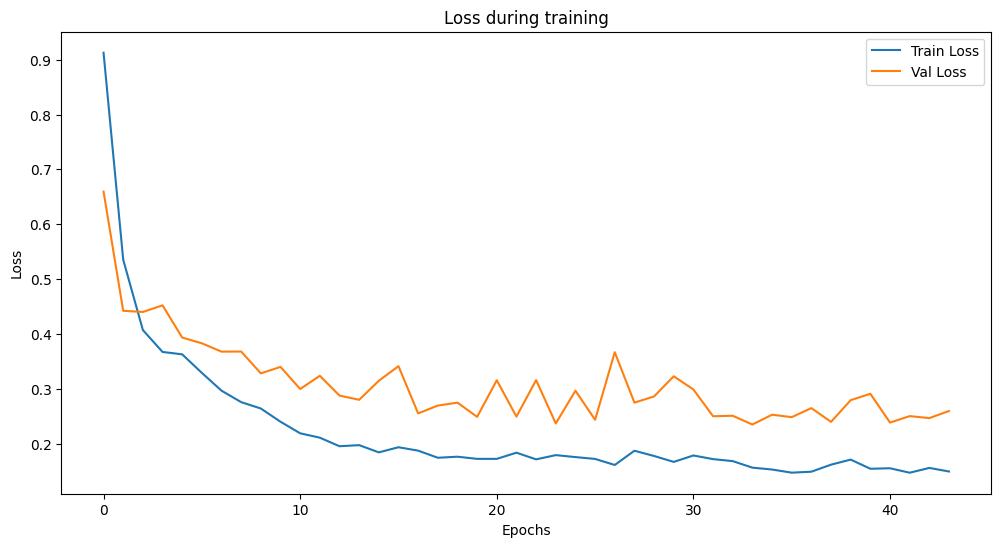

In [65]:
model = Sequential()
model.add(LSTM(120, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  
model.add(LSTM(100, activation='tanh', return_sequences=True)) 
model.add(LSTM(80, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='linear'))  


history, loss, mae, mse,rmse,  mae_test, mse_test, rmse_test,predictions = train_and_evaluate(model, X_train, y_train, X_test, y_test)

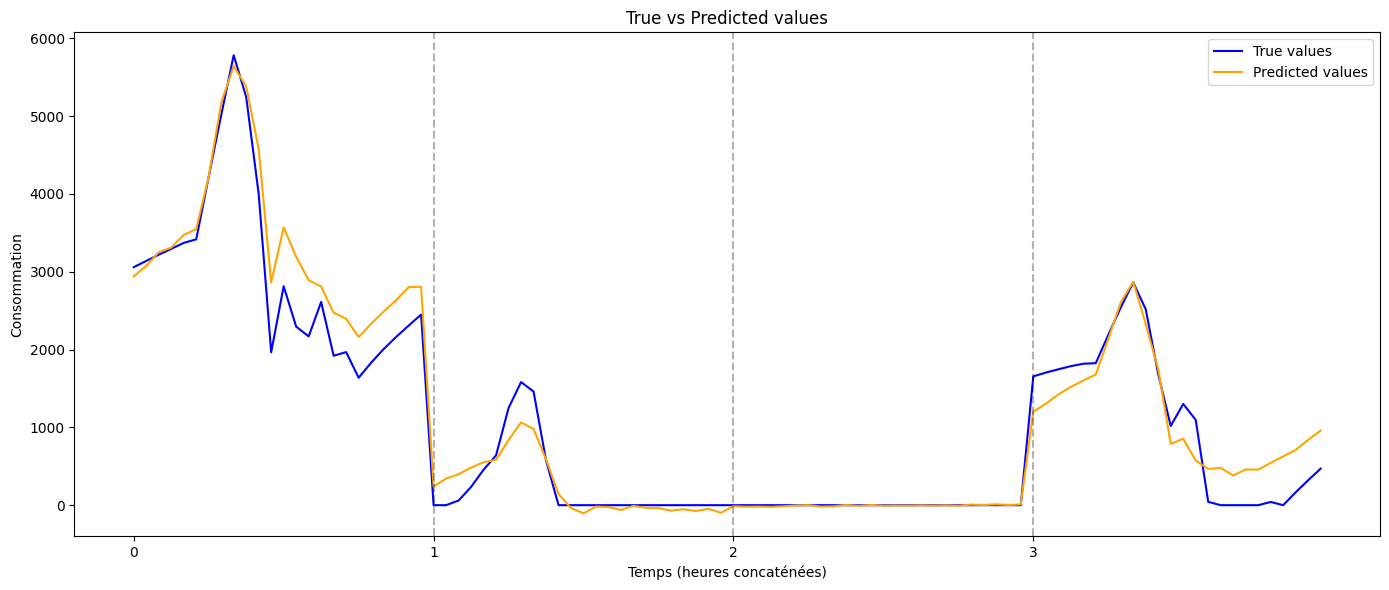

In [260]:
indices = [5, 250, 50, 100]

plot_true_vs_predicted(indices, y_test, predictions, scaler_cons)

In [83]:
Text_conso_24_profil_heat_tou=Text_combined_tou.copy()
Text_conso_24_profil_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_24_profil_heat_tou['clusters'] = conso_tou['clusters']
Text_conso_24_profil_heat_tou=pd.concat([Text_conso_24_profil_heat_tou,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_conso_24_profil_heat_tou.columns = Text_conso_24_profil_heat_tou.columns.astype(str)
Text_conso_24_profil_heat_tou=downsample_majority_class(Text_conso_24_profil_heat_tou,'heat_on')


df2 = Text_conso_24_profil_heat_tou.copy()
scaler_temp2 = StandardScaler() 
scaler_cons2 = StandardScaler()

df_scaled2 = np.hstack([
    scaler_temp2.fit_transform(df2.iloc[:, :24]),   
    df2.iloc[:, 24:25].values, 
    df2.iloc[:, 25:26].values,
    scaler_cons2.fit_transform(df2.iloc[:, 26:]),  
])

df_final2 = pd.DataFrame(df_scaled2, columns=df2.columns)
data2 = df_final2.values  
time_steps = 1  

X2, y2 = [], []
for i in range(1,len(data2) ):
    X2.append(np.hstack([data2[i-1, :], data2[i, :24], data2[i, 24:25], data2[i, 25:26]])) 
    y2.append(data2[i, 26:]) 
X2, y2 = np.array(X2), np.array(y2)

print("Shape of X:", X2.shape) 
print("Shape of y:", y2.shape) 

X2 = X2.reshape(X2.shape[0], 1, X2.shape[1]) 

X_train2=X2[:int((X2.shape[0]*7)/10),:]
X_test2=X2[int((X2.shape[0]*7)/10):,:]
y_train2=y2[:int((y2.shape[0]*7)/10),:]
y_test2=y2[int((y2.shape[0]*7)/10):,:]

Shape of X: (1273, 76)
Shape of y: (1273, 24)


Epoch 1/100


C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.9589 - mae: 0.7768 - mse: 0.9589 - val_loss: 0.9007 - val_mae: 0.7071 - val_mse: 0.9007
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5854 - mae: 0.5770 - mse: 0.5854 - val_loss: 0.5080 - val_mae: 0.4200 - val_mse: 0.5080
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4055 - mae: 0.3943 - mse: 0.4055 - val_loss: 0.5244 - val_mae: 0.4185 - val_mse: 0.5244
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4305 - mae: 0.4218 - mse: 0.4305 - val_loss: 0.4550 - val_mae: 0.3903 - val_mse: 0.4550
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3456 - mae: 0.3683 - mse: 0.3456 - val_loss: 0.4040 - val_mae: 0.3636 - val_mse: 0.4040
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3413 - mae: 0.3696 - mse: 0.3413 - val_loss: 0.3800 - val_mae: 0.3547 - val_mse: 0.3800
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3031 - mae: 0.3508 - mse: 0.3031 - val_loss: 0.3462 - v

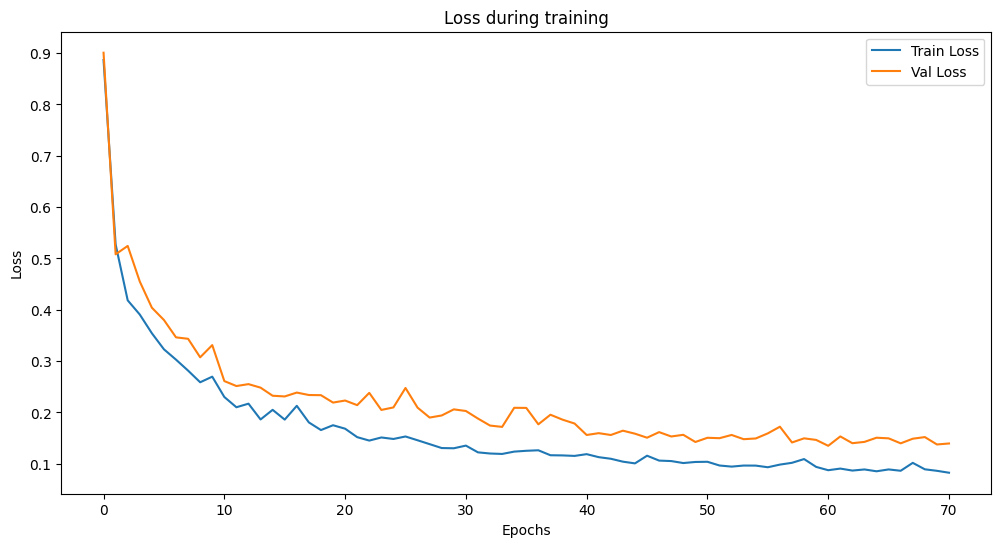

In [84]:
model2 = Sequential()
model2.add(LSTM(120, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2]), return_sequences=True))  
model2.add(LSTM(100, activation='tanh', return_sequences=True)) 
model2.add(LSTM(80, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(24, activation='linear'))  


history2, loss2, mae2, mse2,rmse2,  mae_test2, mse_test2, rmse_test2,predictions2 = train_and_evaluate(model2, X_train2, y_train2, X_test2, y_test2)

In [22]:
import matplotlib.pyplot as plt

def plot_true_vs_predicted(indices, y_test, predictions, scaler_cons):
    true_total = []
    pred_total = []
    x_ticks = []

    for idx in indices:
        # Ajouter les 2 premiers jours réels (en bleu)
        for i in range(4):  # Les 2 premiers jours sont réels (en bleu)
            conso_reel = scaler_cons.inverse_transform(y_test[idx + i].reshape(1, 24))
            true_total.extend(conso_reel.flatten())

        # Ajouter le 3ème jour de prédiction (en rouge)
        conso_pred = scaler_cons.inverse_transform(predictions[idx + 4].reshape(1, 24))
        pred_total.extend(conso_pred.flatten())

        # Mettre à jour les ticks X pour chaque heure des 3 jours
        x_ticks = list(range(len(true_total)))

    # Visualiser
    plt.figure(figsize=(14, 6))

    # Tracer les consommations réelles pour les deux premiers jours en bleu
    plt.plot(true_total[:48], label='True values (2 premiers jours)', color='blue')  # 48 heures (2 jours)

    # Tracer la prédiction pour le 3ème jour en rouge
    plt.plot(range(48, 72), pred_total, label='Predicted values (3ème jour)', color='red')  # 72h pour le 3ème jour

    plt.title('Consommation réelle (2 premiers jours) vs Prédiction (3ème jour)')
    plt.xlabel('Temps (heures concaténées)')
    plt.ylabel('Consommation')

    # Ajouter les lignes verticales pour marquer la fin de chaque jour
    for xt in [24, 48]:  # Après chaque jour pour marquer les transitions
        plt.axvline(x=xt, color='black', linestyle='--', alpha=0.3)

    # Configuration des labels des axes x
    x_labels = [str(i) for i in range(24)]  # Étiquettes pour 24 heures
    x_labels_repeated = (x_labels * 3)[:len(true_total)]  # Répéter pour 3 jours
    plt.xticks(ticks=x_ticks, labels=x_labels_repeated)

    plt.legend()
    plt.tight_layout()
    plt.show()


ValueError: The number of FixedLocator locations (96), usually from a call to set_ticks, does not match the number of labels (72).

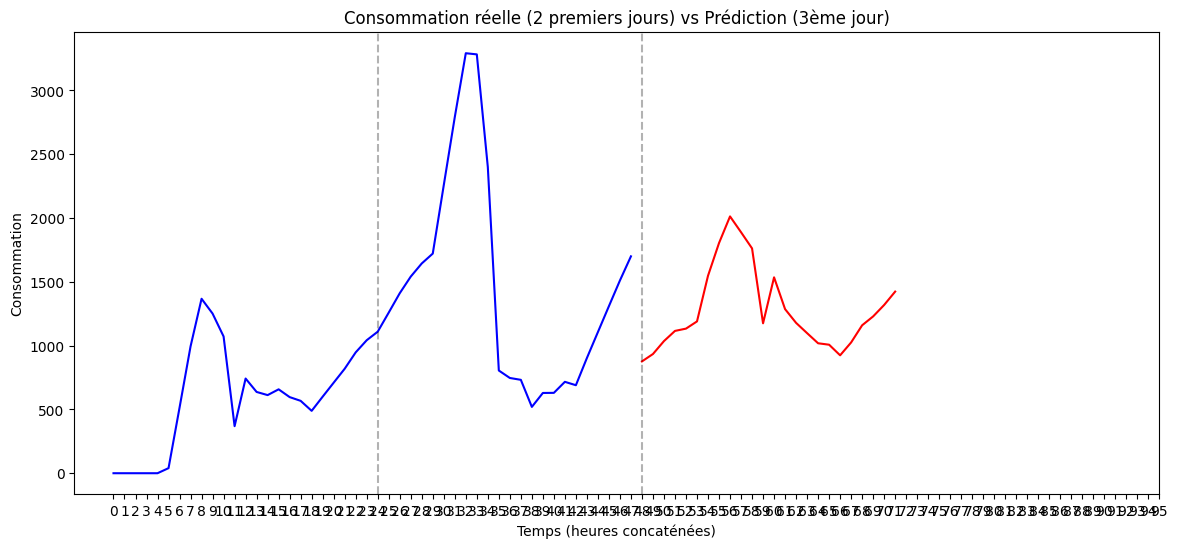

In [23]:
indices = [7]

plot_true_vs_predicted(indices, y_test2, predictions2, scaler_cons2)

In [85]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_true_vs_predicted(indices, y_test, predictions, scaler_cons):
    true_total = []
    pred_total = []

    # Itérer sur chaque indice pour ajouter les données réelles et prédites
    for idx in indices:
        # Ajouter les jours réels (24 heures par jour) - 1 jour réel par indice
        conso_reel = scaler_cons.inverse_transform(y_test[idx].reshape(1, 24))
        true_total.extend(conso_reel.flatten())

        # Ajouter la prédiction pour le jour suivant (en rouge)
        conso_pred = scaler_cons.inverse_transform(predictions[idx + 1].reshape(1, 24))  # Jour suivant
        pred_total.extend(conso_pred.flatten())

    # Visualiser
    plt.figure(figsize=(14, 5))

    # Tracer les consommations réelles pour les jours réels en bleu
    plt.plot(true_total, label='True values', color='blue')  # Tracer toutes les heures réelles

    # Tracer les prédictions pour les jours suivants en rouge
    plt.plot(range(len(true_total), len(true_total) + len(pred_total)), pred_total, label='Predicted values', color='red')

    plt.title('Consommation réelle vs Prédiction')
    plt.xlabel('Temps (heures concaténées)')
    plt.ylabel('Consommation')

    # Ajouter les lignes verticales pour marquer la fin de chaque jour
    
    plt.axvline(x=72, color='black', linestyle='--', alpha=0.3)

    # Ajuster les limites de l'axe Y pour compacter l'affichage
    min_value = min(true_total + pred_total) - 10
    max_value = max(true_total + pred_total) + 10
    plt.ylim(min_value, max_value)

    # Ajuster le nombre de ticks sur l'axe Y
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Fixer le nombre de ticks à 10

    # Ajuster les labels sur l'axe X pour couvrir toute la plage sans répétition
    num_hours = len(true_total) + len(pred_total)
    # Créer une liste de labels sur l'axe X de 0 à la fin des données
    x_labels = list(range(num_hours))

    # Ajuster la fréquence des ticks sur l'axe X (par exemple, un tick toutes les 6 heures)
    ticks_interval = 6  # Espacer les ticks tous les 6 heures
    plt.xticks(ticks=list(range(0, num_hours, ticks_interval)), labels=x_labels[::ticks_interval])

    plt.legend()
    plt.tight_layout()
    plt.show()


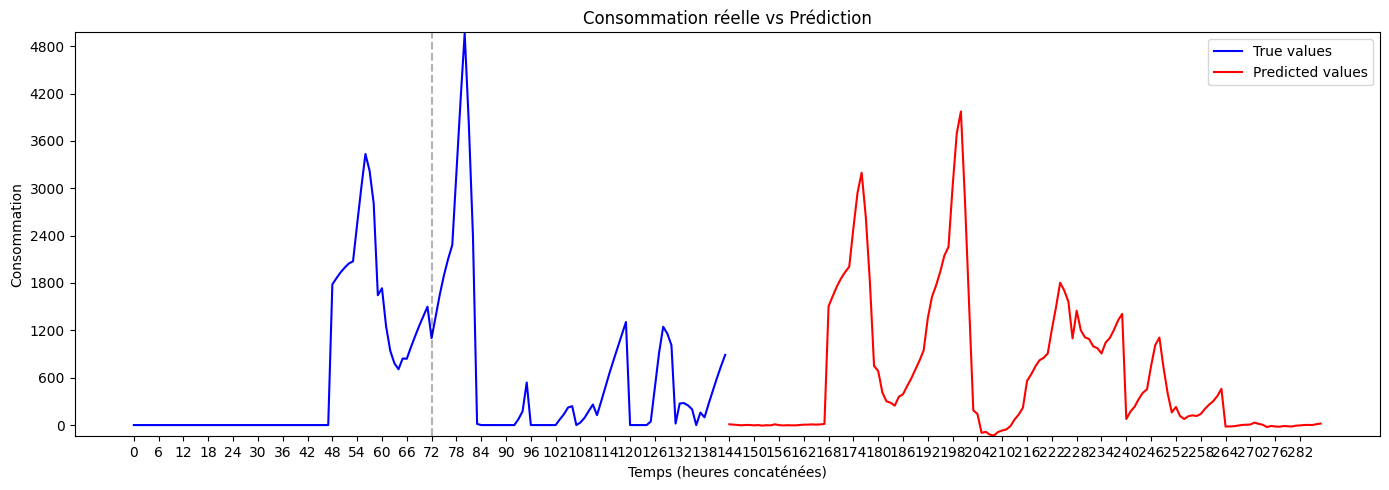

In [86]:
indices = [2,3,4,5,6,7]

plot_true_vs_predicted(indices, y_test2, predictions2, scaler_cons2)

In [195]:
y_test2[25]

array([-0.6215127 , -0.65482787, -0.68288558, -0.70798439, -0.73049312,
       -0.74956756, -0.79279633, -0.80918947, -0.79187002, -0.73862875,
       -0.65111886, -0.51979447, -0.48827195, -0.4450191 , -0.42222976,
       -0.41531277, -0.41603812, -0.45045864, -0.46400074, -0.49676873,
       -0.51962076, -0.54620975, -0.56979027, -0.59696301])

In [ ]:
y_test2[2]

In [156]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_true_vs_predicted(start_index, num_days, y_test, predictions, scaler_cons):
    true_total = []
    pred_total = []
    
    # Itérer sur chaque indice pour ajouter les données réelles et prédites
    for idx in range(start_index, start_index + num_days):
        # Ajouter les jours réels (24 heures par jour) - 1 jour réel par indice
        conso_reel = scaler_cons.inverse_transform(y_test[idx].reshape(1, 24))
        true_total.extend(conso_reel.flatten())

        # Ajouter la prédiction pour le jour suivant (en rouge)
    conso_pred = scaler_cons.inverse_transform(predictions[start_index + num_days].reshape(1, 24))  # Jour suivant
    pred_total.extend(conso_pred.flatten())

    # Visualiser
    plt.figure(figsize=(12, 5))

    # Tracer les consommations réelles pour les jours réels en bleu
    plt.plot(true_total, label='Observed', color='blue')  # Tracer toutes les heures réelles

    # Tracer les prédictions pour les jours suivants en rouge
    plt.plot(range(len(true_total), len(true_total) + len(pred_total)), pred_total, label='Predicted ', color='red')

    plt.xlabel('heures')
    plt.ylabel('Consommation de chauffage')

    
    plt.axvline(x=num_days*24, color='black', linestyle='--', alpha=0.3)

    # Ajuster les limites de l'axe Y pour compacter l'affichage
    min_value = min(true_total + pred_total) - 10
    max_value = max(true_total + pred_total) + 10

    # Ajuster le nombre de ticks sur l'axe Y
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Fixer le nombre de ticks à 10

    # Ajuster les labels sur l'axe X pour couvrir toute la plage sans répétition
    num_hours = len(true_total) + len(pred_total)
    # Créer une liste de labels sur l'axe X de 0 à la fin des données
    x_labels = list(range(num_hours))

    # Ajuster la fréquence des ticks sur l'axe X (par exemple, un tick toutes les 6 heures)
    ticks_interval = 6  # Espacer les ticks tous les 6 heures
    plt.xticks(ticks=list(range(0, num_hours, ticks_interval)), labels=x_labels[::ticks_interval])
    plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')  # Grid en arrière-plan

    plt.legend()
    plt.tight_layout()
    plt.show()



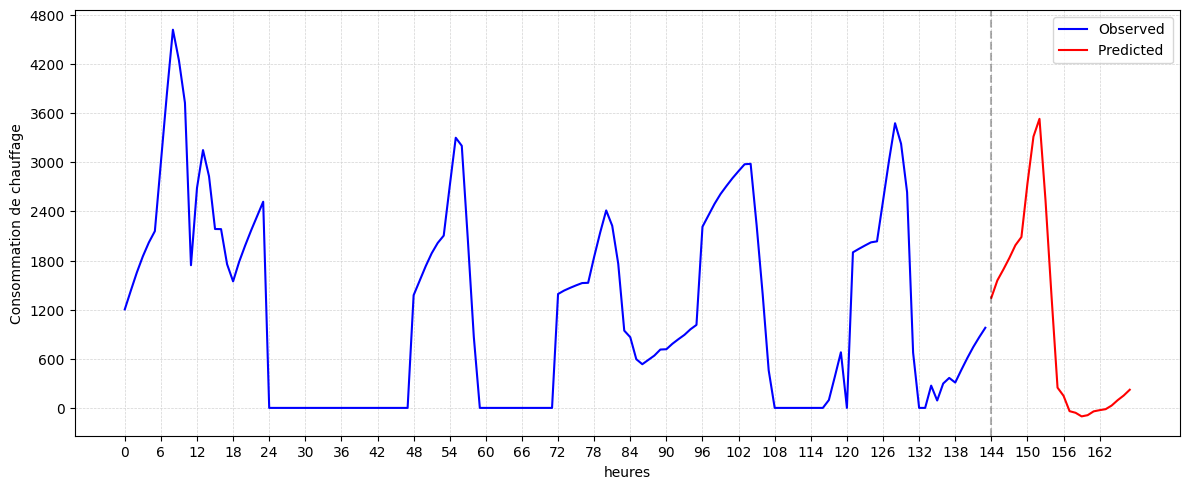

In [157]:
plot_true_vs_predicted(20,6, y_test2, predictions2, scaler_cons2)

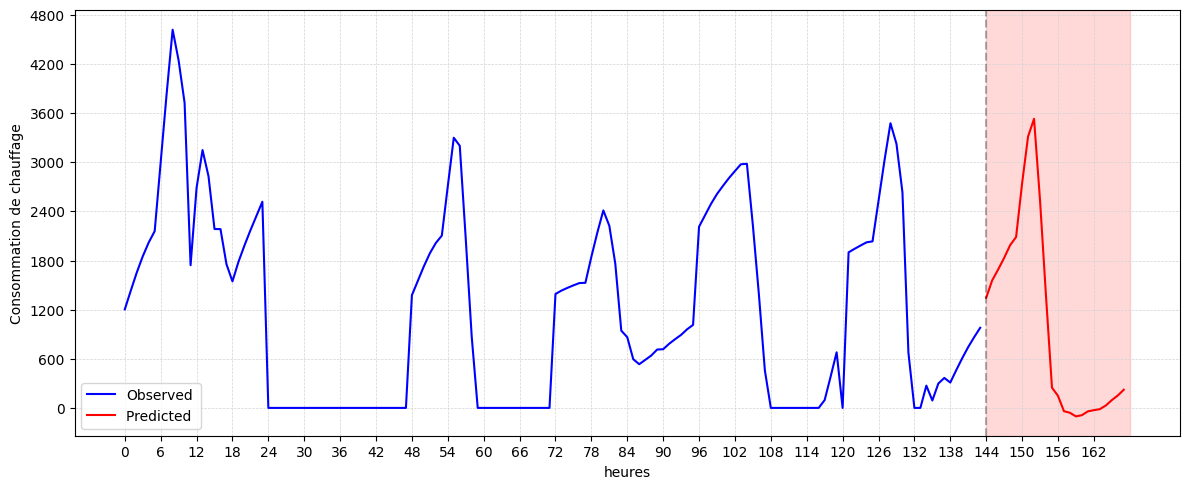

In [155]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_true_vs_predicted(start_index, num_days, y_test, predictions, scaler_cons):
    true_total = []
    pred_total = []
    
    # Itérer sur chaque indice pour ajouter les données réelles et prédites
    for idx in range(start_index, start_index + num_days):
        # Ajouter les jours réels (24 heures par jour) - 1 jour réel par indice
        conso_reel = scaler_cons.inverse_transform(y_test[idx].reshape(1, 24))
        true_total.extend(conso_reel.flatten())

        # Ajouter la prédiction pour le jour suivant (en rouge)
    conso_pred = scaler_cons.inverse_transform(predictions[start_index + num_days].reshape(1, 24))  # Jour suivant
    pred_total.extend(conso_pred.flatten())

    # Visualiser
    plt.figure(figsize=(12, 5))

    # Tracer les consommations réelles pour les jours réels en bleu
    plt.plot(true_total, label='Observed', color='blue')  # Tracer toutes les heures réelles

    # Tracer les prédictions pour les jours suivants en rouge
    plt.plot(range(len(true_total), len(true_total) + len(pred_total)), pred_total, label='Predicted ', color='red')

    # Colorier l'arrière-plan des dernières 24 heures en rouge clair
    plt.axvspan(len(true_total)+  24, len(true_total), color=(1, 0.5, 0.5), alpha=0.3)  # Dernières 24 heures en rouge clair

    plt.xlabel('heures')
    plt.ylabel('Consommation de chauffage')

    # Ajouter une ligne verticale pour séparer les jours
    plt.axvline(x=num_days*24, color='black', linestyle='--', alpha=0.3)

    # Ajuster les limites de l'axe Y pour compacter l'affichage
    min_value = min(true_total + pred_total) - 10
    max_value = max(true_total + pred_total) + 10

    # Ajuster le nombre de ticks sur l'axe Y
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Fixer le nombre de ticks à 10

    # Ajuster les labels sur l'axe X pour couvrir toute la plage sans répétition
    num_hours = len(true_total) + len(pred_total)
    x_labels = list(range(num_hours))

    # Ajuster la fréquence des ticks sur l'axe X (par exemple, un tick toutes les 6 heures)
    ticks_interval = 6  # Espacer les ticks tous les 6 heures
    plt.xticks(ticks=list(range(0, num_hours, ticks_interval)), labels=x_labels[::ticks_interval])
    plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')  # Grid en arrière-plan

    plt.legend()
    plt.tight_layout()
    plt.show()
plot_true_vs_predicted(20,6, y_test2, predictions2, scaler_cons2)

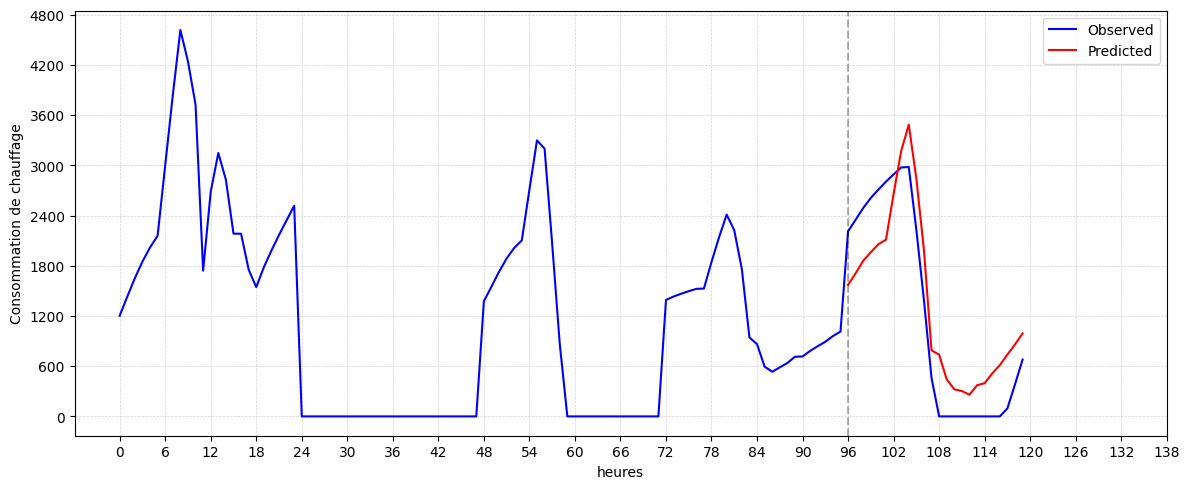

In [211]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_true_vs_predicted(start_index, num_days, y_test, predictions, scaler_cons):
    true_total = []
    pred_total = []
    true_predicted_day_total = []  # Pour les vraies valeurs du jour prédit
    
    # Itérer sur chaque indice pour ajouter les données réelles et prédites
    for idx in range(start_index, start_index + num_days+1):
        if idx!=start_index + num_days:
            conso_reel = scaler_cons.inverse_transform(y_test[idx].reshape(1, 24))
            true_total.extend(conso_reel.flatten())
       # else:
       #     conso_pred_real = scaler_cons.inverse_transform(y_test[start_index + num_days  ].reshape(1, 24))  # Valeurs réelles du jour prédit
       #     true_predicted_day_total.extend(conso_pred_real.flatten())
        # Ajouter la prédiction pour le jour suivant (en rouge)
    conso_pred = scaler_cons.inverse_transform(predictions[start_index + num_days].reshape(1, 24))  # Jour suivant
    pred_total.extend(conso_pred.flatten())
        
        # Ajouter les valeurs réelles pour le jour prédit (en vert)
    

    # Visualiser
    plt.figure(figsize=(12, 5))

    # Tracer les consommations réelles pour les jours réels en bleu
    plt.plot(true_total, label='Observed', color='blue')  # Tracer toutes les heures réelles

    # Tracer les prédictions pour les jours suivants en rouge
    plt.plot(range(len(true_total)-24, len(true_total) + len(pred_total)-24), pred_total, label='Predicted', color='red')

    # Tracer les valeurs réelles pour le jour prédit en vert
    #plt.plot(range(len(true_total) , len(true_total) + len(true_predicted_day_total) ), true_predicted_day_total, label='valeurs réelles', color='green')

    # Colorier l'arrière-plan des dernières 24 heures en rouge clair
   # plt.axvspan(len(true_total), len(true_total) + 24, color=(1, 0.5, 0.5), alpha=0.3)  # Dernières 24 heures en rouge clair

    plt.xlabel('heures')
    plt.ylabel('Consommation de chauffage')

    # Ajouter une ligne verticale pour séparer les jours
    plt.axvline(x=(num_days-1)*24, color='black', linestyle='--', alpha=0.3)

    # Ajuster les limites de l'axe Y pour compacter l'affichage
    min_value = min(true_total + pred_total) - 10
    max_value = max(true_total + pred_total) + 10

    # Ajuster le nombre de ticks sur l'axe Y
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Fixer le nombre de ticks à 10

    # Ajuster les labels sur l'axe X pour couvrir toute la plage sans répétition
    num_hours = len(true_total) + len(pred_total)
    x_labels = list(range(num_hours))

    # Ajuster la fréquence des ticks sur l'axe X (par exemple, un tick toutes les 6 heures)
    ticks_interval = 6  # Espacer les ticks tous les 6 heures
    plt.xticks(ticks=list(range(0, num_hours, ticks_interval)), labels=x_labels[::ticks_interval])

    # Afficher la légende
    plt.legend()

    # Afficher la grille de fond pour la lisibilité
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

    # Ajuster l'affichage
    plt.tight_layout()
    plt.show()

# Appel de la fonction avec les données fournies
plot_true_vs_predicted(20, 5, y_test2, predictions2, scaler_cons2)


In [203]:
scaler_cons2.inverse_transform(y_test2[22].reshape(1, 24))

array([[1391.14471173, 1433.11917723, 1466.27895711, 1496.88494167,
        1524.8968712 , 1527.94658246, 1846.00740157, 2142.26850554,
        2412.04859544, 2224.7837515 , 1760.72345456,  943.84047145,
         863.66805488,  594.96178796,  533.59791047,  586.39660285,
         639.06585113,  712.98399596,  716.71243462,  783.2595798 ,
         839.39032585,  892.16337816,  960.08301167, 1013.84712212]])

In [205]:
scaler_cons2.inverse_transform(y_test2[23].reshape(1, 24))

array([[1391.14471173, 1433.11917723, 1466.27895711, 1496.88494167,
        1524.8968712 , 1527.94658246, 1846.00740157, 2142.26850554,
        2412.04859544, 2224.7837515 , 1760.72345456,  943.84047145,
         863.66805488,  594.96178796,  533.59791047,  586.39660285,
         639.06585113,  712.98399596,  716.71243462,  783.2595798 ,
         839.39032585,  892.16337816,  960.08301167, 1013.84712212]])

In [68]:
Text_Wind_Solar_Ground_conso_heat_tou2=pd.concat([Text_combined_tou,Wind_combined_tou, Solar_combined_tou,Ground_combined_tou], axis=1).reset_index(drop=True)
Text_Wind_Solar_Ground_conso_heat_tou2['heat_on'] = conso_tou['heat_on']
Text_Wind_Solar_Ground_conso_heat_tou2=pd.concat([Text_Wind_Solar_Ground_conso_heat_tou2,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_Wind_Solar_Ground_conso_heat_tou2.columns = Text_Wind_Solar_Ground_conso_heat_tou2.columns.astype(str)
Text_Wind_Solar_Ground_conso_heat_tou2=downsample_majority_class(Text_Wind_Solar_Ground_conso_heat_tou2,'heat_on')


df4 = Text_Wind_Solar_Ground_conso_heat_tou2.copy()
scaler_temp4 = StandardScaler() 
scaler_cons4 = StandardScaler()

df_scaled4 = np.hstack([
    scaler_temp4.fit_transform(df4.iloc[:, :24]),
    scaler_temp4.fit_transform(df4.iloc[:, 24:48]),  
     scaler_temp4.fit_transform(df4.iloc[:, 48:72]),  
     scaler_temp4.fit_transform(df4.iloc[:, 72:96]),  
    df4.iloc[:, 96:97].values,
    scaler_cons4.fit_transform(df4.iloc[:, 97:]),  
])

df_final4 = pd.DataFrame(df_scaled4, columns=df4.columns)
data4 = df_final4.values  
time_steps = 1  

X4, y4 = [], []
for i in range(1,len(data4) ):
    X4.append(np.hstack([data4[i-1, :97], data4[i, :97]])) 
    y4.append(data4[i, 97:]) 
X4, y4 = np.array(X4), np.array(y4)

print("Shape of X:", X4.shape) 
print("Shape of y:", y4.shape) 

X4 = X4.reshape(X4.shape[0], 1, X4.shape[1]) 

X_train4=X4[:int((X4.shape[0]*8)/10),:]
X_test4=X4[int((X4.shape[0]*8)/10):,:]
y_train4=y4[:int((y4.shape[0]*8)/10),:]
y_test4=y4[int((y4.shape[0]*8)/10):,:]

Shape of X: (1273, 194)
Shape of y: (1273, 24)


**************************************************
preditcion en fonciton de TEXT +wind +HEATSTATUS+ HUM + CONSO
**************************************************
Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.9362 - mae: 0.7619 - mse: 0.9362 - val_loss: 0.6381 - val_mae: 0.6221 - val_mse: 0.6381
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6477 - mae: 0.5747 - mse: 0.6477 - val_loss: 0.4232 - val_mae: 0.3946 - val_mse: 0.4232
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3858 - mae: 0.3883 - mse: 0.3858 - val_loss: 0.3920 - val_mae: 0.3795 - val_mse: 0.3920
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3509 - mae: 0.3805 - mse: 0.3509 - val_loss: 0.3754 - val_mae: 0.3634 - val_mse: 0.3754
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3139 - mae: 0.3552 - mse: 0.3139 - val_loss: 0.3796 - val_mae: 0.3617 - val_mse: 0.3796
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3071 - mae: 0.3497 - mse: 0.3071 - val_loss: 0.3787 - val_mae: 0.3607 - val_mse: 0.3787
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2614 - mae: 0.3185 - mse: 0.2614 - val_loss: 0.3766 - 

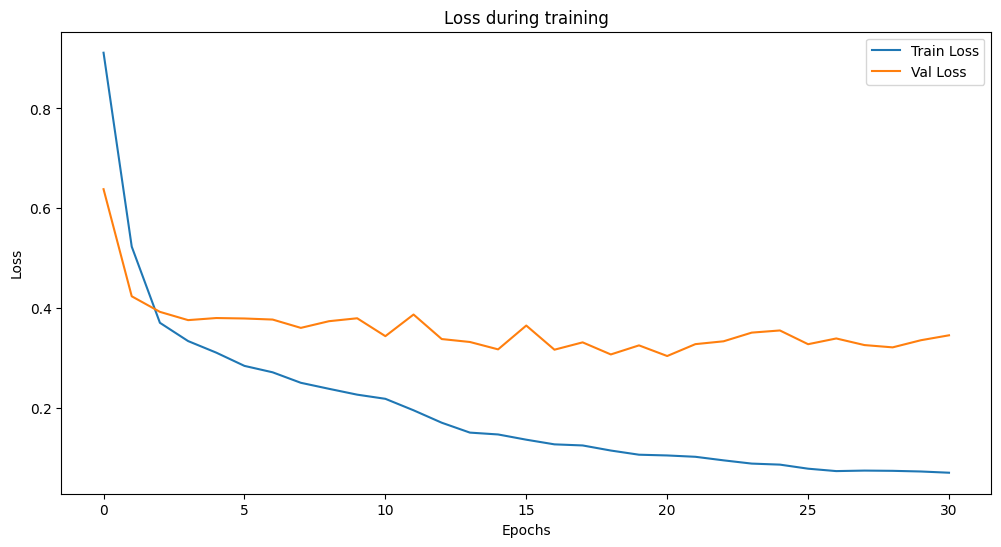

In [115]:
model4 = Sequential()
model4.add(LSTM(120, activation='tanh', input_shape=(X_train4.shape[1], X_train4.shape[2]), return_sequences=True))  
model4.add(LSTM(100, activation='tanh', return_sequences=True)) 
model4.add(LSTM(80, activation='tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(24, activation='linear'))  

print("*"*50)
print("preditcion en fonciton de TEXT +wind +HEATSTATUS+ HUM + CONSO")
print("*"*50)
history4, loss4, mae4, mse4,rmse4,  mae_test4, mse_test4, rmse_test4,predictions4 = train_and_evaluate(model4, X_train4, y_train4, X_test4, y_test4)

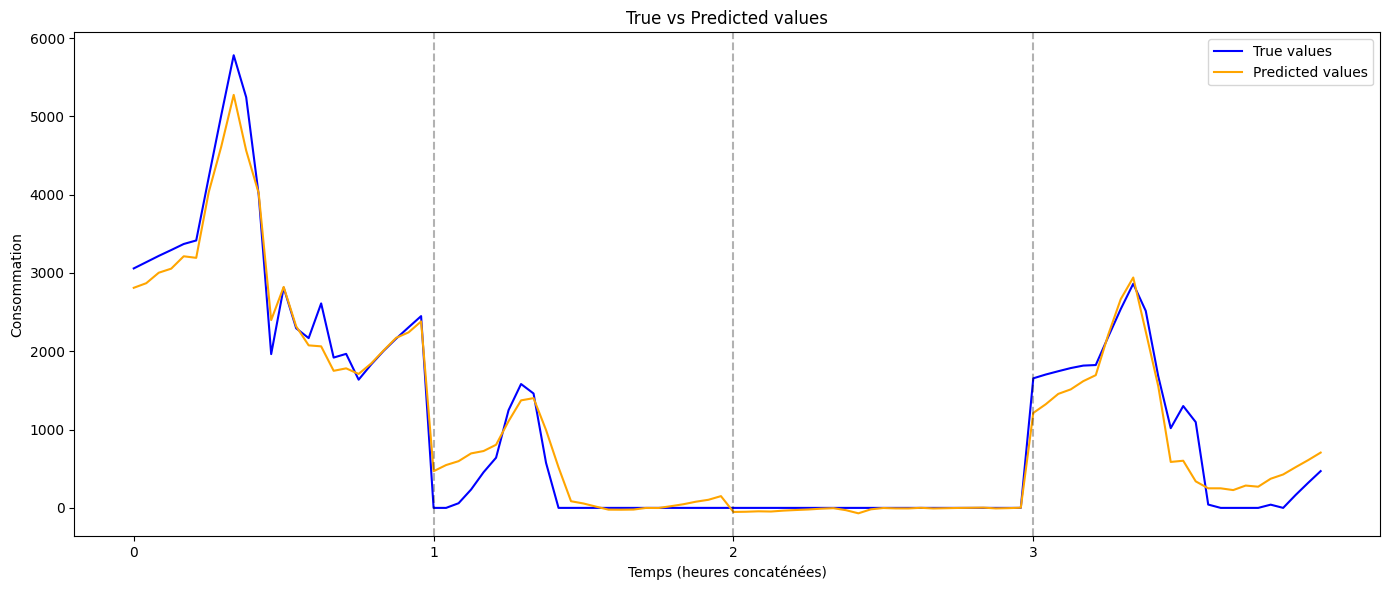

In [116]:
indices = [5, 250, 50, 100]

plot_true_vs_predicted(indices, y_test4, predictions4, scaler_cons)

In [555]:
Text_occ_combined_tou = pd.concat([occupation, occupation,occupation,occupation], axis=0).reset_index(drop=True)
occ_combined_tou = pd.concat([Text_occ_combined_tou,Solar_combined_tou], axis=1).reset_index(drop=True)
occ_combined_tou['heat_on'] = conso_tou['heat_on']
Solar_conso_heat_tou=pd.concat([occ_combined_tou,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)

Solar_conso_heat_tou.columns = Solar_conso_heat_tou.columns.astype(str)
Solar_conso_heat_tou=downsample_majority_class(Solar_conso_heat_tou,'heat_on')


df5 = Solar_conso_heat_tou.copy()
scaler_temp5 = StandardScaler() 
scaler_cons5 = StandardScaler()

df_scaled5 = np.hstack([
    scaler_temp5.fit_transform(df5.iloc[:, :49]), 
    scaler_cons5.fit_transform(df5.iloc[:, 49:]),  
])

df_final5 = pd.DataFrame(df_scaled5, columns=df5.columns)
data5 = df_final5.values  
time_steps = 1  

X5, y5 = [], []
for i in range(1,len(data5) ):
    X5.append(np.hstack([data5[i-1, :25], data5[i, :25]])) 
    y5.append(data5[i, 49:]) 
X5, y5 = np.array(X5), np.array(y5)

print("Shape of X:", X5.shape) 
print("Shape of y:", y5.shape) 

X5 = X5.reshape(X5.shape[0], 1, X5.shape[1]) 

X_train5=X5[:int((X5.shape[0]*8)/10),:]
X_test5=X5[int((X5.shape[0]*8)/10):,:]
y_train5=y5[:int((y5.shape[0]*8)/10),:]
y_test5=y5[int((y5.shape[0]*8)/10):,:]

Shape of X: (1273, 50)
Shape of y: (1273, 24)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.0715 - mae: 0.7937 - mse: 1.0715 - val_loss: 0.9319 - val_mae: 0.7629 - val_mse: 0.9319
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8880 - mae: 0.7453 - mse: 0.8880 - val_loss: 0.9308 - val_mae: 0.7592 - val_mse: 0.9308
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9360 - mae: 0.7585 - mse: 0.9360 - val_loss: 0.9300 - val_mae: 0.7604 - val_mse: 0.9300
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9463 - mae: 0.7659 - mse: 0.9463 - val_loss: 0.9297 - val_mae: 0.7570 - val_mse: 0.9297
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0136 - mae: 0.7801 - mse: 1.0136 - val_loss: 0.9281 - val_mae: 0.7573 - val_mse: 0.9281
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9565 - mae: 0.7639 - mse: 0.9565 - val_loss: 0.9284 - val_mae: 0.7552 - val_mse: 0.9284
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9355 - mae: 0.7552 - mse: 0.9355 - val_loss: 0.9292 - va

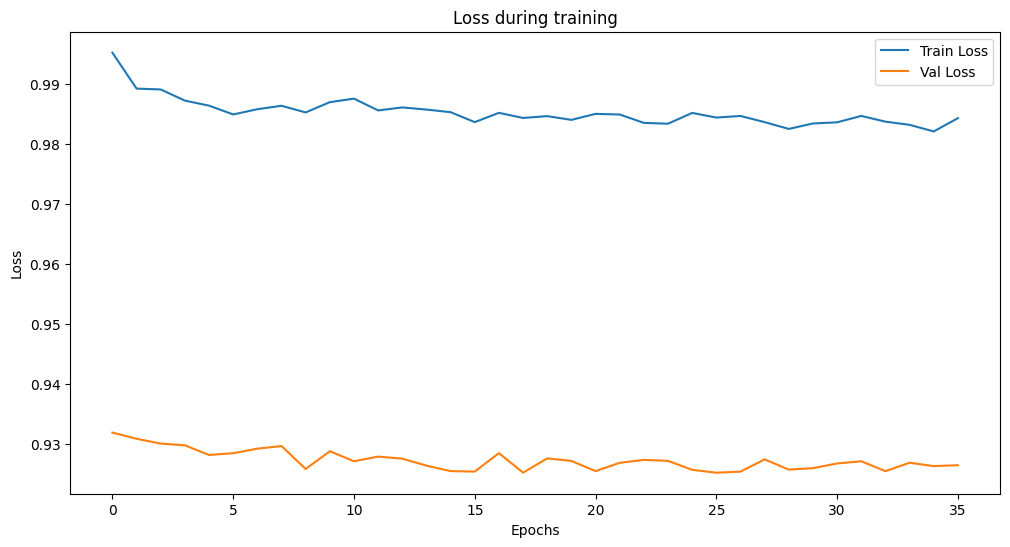

In [559]:
model5 = Sequential()
model5.add(LSTM(64, activation='tanh', input_shape=(X_train5.shape[1], X_train5.shape[2])))
model5.add(Dropout(0.2))
model5.add(Dense(24, activation='linear'))  


history5, loss5, mae5, mse5,rmse5,  mae_test5, mse_test5, rmse_test5,predictions5 = train_and_evaluate(model5, X_train5, y_train5, X_test5, y_test5)

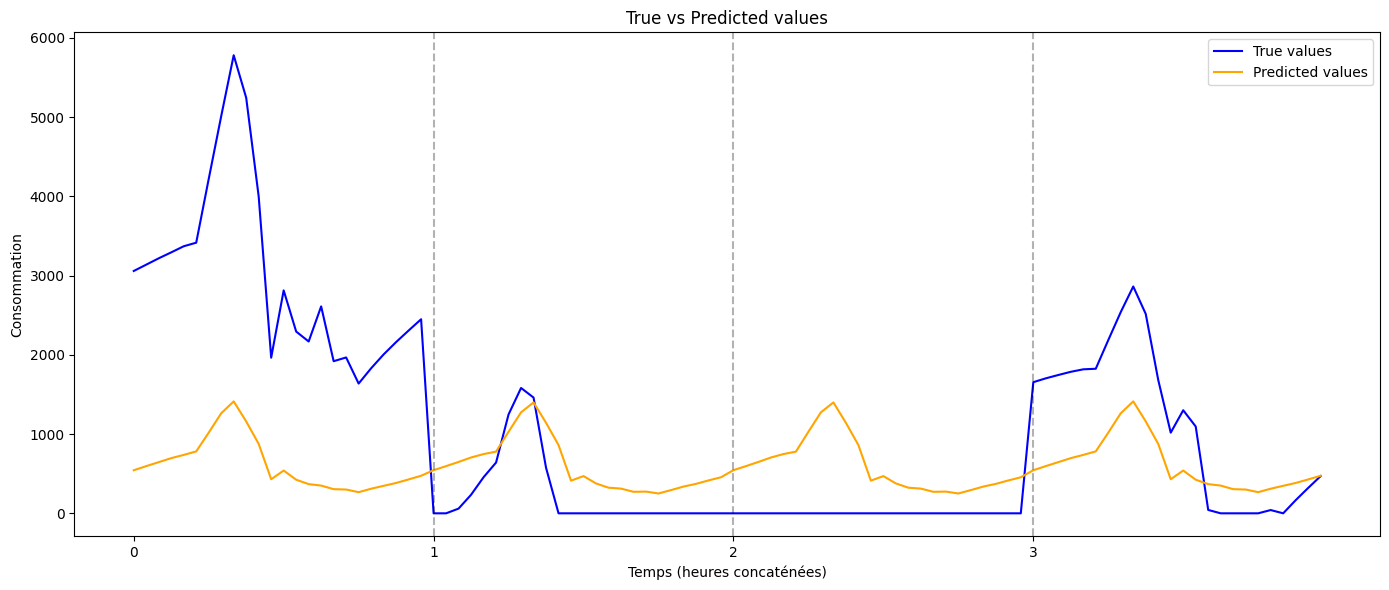

In [244]:
indices = [5, 250, 50, 100]

plot_true_vs_predicted(indices, y_test5, predictions5, scaler_cons)

In [248]:
Text_Tint_conso_24_heat_tou=Text_combined_tou.copy()
Text_Tint_conso_24_heat_tou=pd.concat([Text_Tint_conso_24_heat_tou,Tint_combined_tou],axis=1).reset_index(drop=True)
Text_Tint_conso_24_heat_tou['heat_on'] = conso_tou['heat_on']
Text_Tint_conso_24_heat_tou=pd.concat([Text_Tint_conso_24_heat_tou,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_Tint_conso_24_heat_tou.columns = Text_Tint_conso_24_heat_tou.columns.astype(str)
Text_Tint_conso_24_heat_tou=downsample_majority_class(Text_Tint_conso_24_heat_tou,'heat_on')



df3 = Text_Tint_conso_24_heat_tou.copy()
scaler_temp3 = StandardScaler() 
scaler_cons3 = StandardScaler()

df_scaled3 = np.hstack([
    scaler_temp3.fit_transform(df3.iloc[:, :24]),
    scaler_temp3.fit_transform(df3.iloc[:, 24:48]),  
    
    df3.iloc[:, 48:49].values,
    scaler_cons3.fit_transform(df3.iloc[:, 49:]),  
])

df_final3 = pd.DataFrame(df_scaled3, columns=df3.columns)
data3 = df_final3.values  
time_steps = 1  

X3, y3 = [], []
for i in range(1,len(data3) ):
    X3.append(np.hstack([data3[i-1, :], data3[i, :24], data3[i, 24:48], data3[i, 48:49]])) 
    y3.append(data3[i, 49:]) 
X3, y3 = np.array(X3), np.array(y3)

print("Shape of X:", X3.shape) 
print("Shape of y:", y3.shape) 

X3 = X3.reshape(X3.shape[0], 1, X3.shape[1]) 

X_train3=X3[:int((X3.shape[0]*8)/10),:]
X_test3=X3[int((X3.shape[0]*8)/10):,:]
y_train3=y3[:int((y3.shape[0]*8)/10),:]
y_test3=y3[int((y3.shape[0]*8)/10):,:]

Shape of X: (1273, 122)
Shape of y: (1273, 24)


**************************************************
preditcion en fonciton de TEXT +TINT +HEATSTATUS + CONSO
**************************************************
Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.9186 - mae: 0.7514 - mse: 0.9186 - val_loss: 0.6469 - val_mae: 0.6074 - val_mse: 0.6469
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6341 - mae: 0.5513 - mse: 0.6341 - val_loss: 0.4209 - val_mae: 0.3900 - val_mse: 0.4209
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3454 - mae: 0.3639 - mse: 0.3454 - val_loss: 0.3781 - val_mae: 0.3662 - val_mse: 0.3781
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3190 - mae: 0.3545 - mse: 0.3190 - val_loss: 0.4046 - val_mae: 0.3779 - val_mse: 0.4046
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2651 - mae: 0.3125 - mse: 0.2651 - val_loss: 0.3679 - val_mae: 0.3521 - val_mse: 0.3679
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2808 - mae: 0.3274 - mse: 0.2808 - val_loss: 0.3375 - val_mae: 0.3342 - val_mse: 0.3375
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3047 - mae: 0.3375 - mse: 0.3047 - val_loss: 0.4448 - va

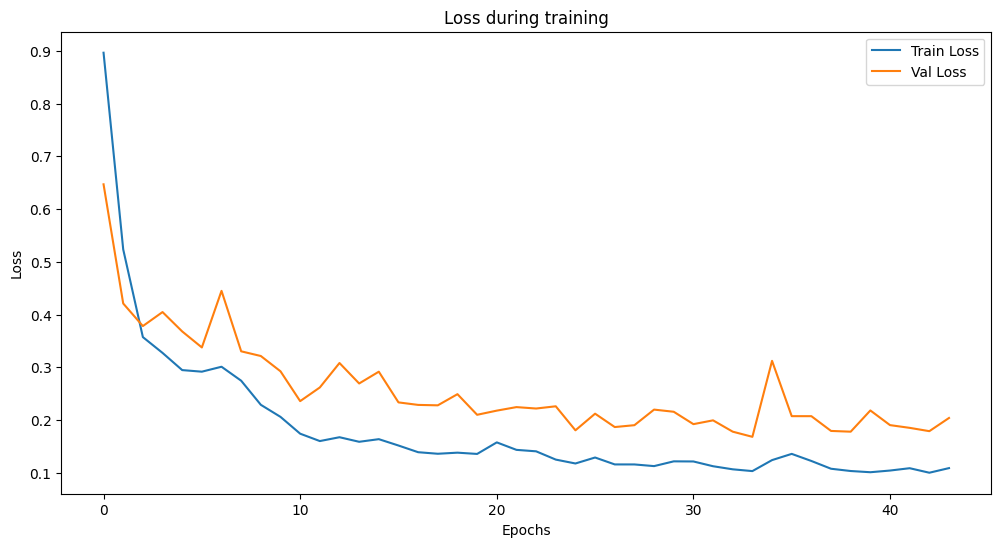

In [249]:
model3 = Sequential()
model3.add(LSTM(120, activation='tanh', input_shape=(X_train3.shape[1], X_train3.shape[2]), return_sequences=True))  
model3.add(LSTM(100, activation='tanh', return_sequences=True)) 
model3.add(LSTM(80, activation='tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(24, activation='linear'))  

print("*"*50)
print("preditcion en fonciton de TEXT +TINT +HEATSTATUS + CONSO")
print("*"*50)
history3, loss3, mae3, mse3,rmse3,  mae_test3, mse_test3, rmse_test3,predictions3 = train_and_evaluate(model3, X_train3, y_train3, X_test3, y_test3)

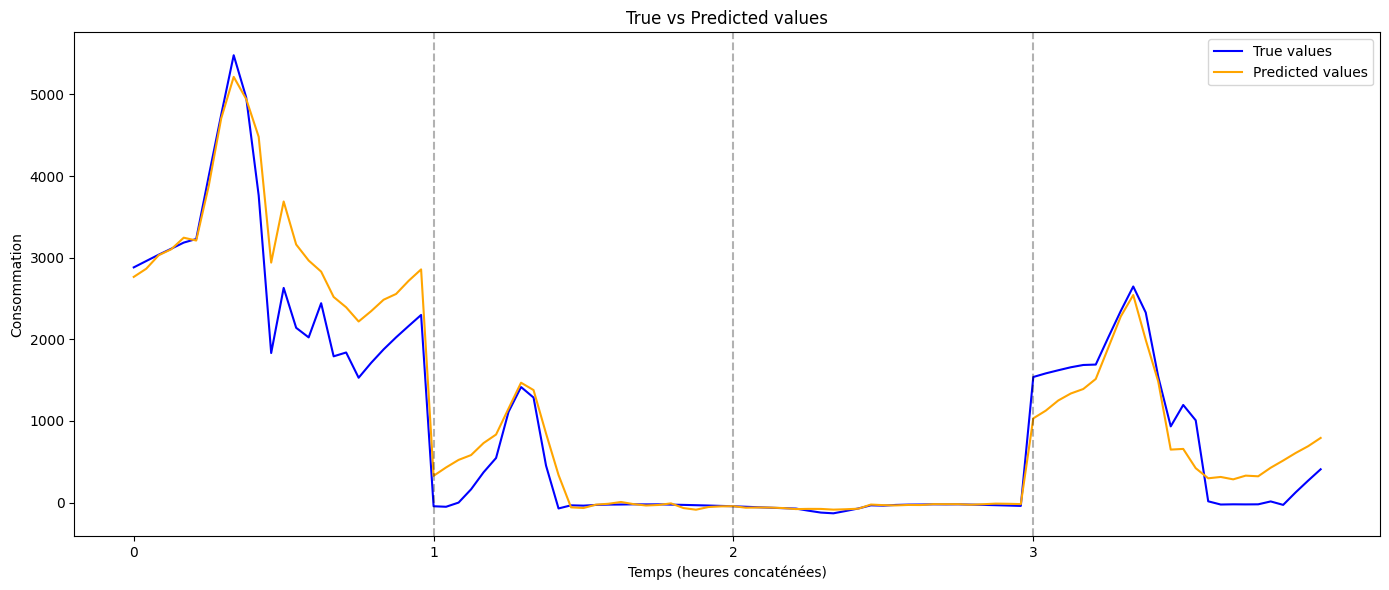

In [476]:
indices = [5, 250, 50, 100]

plot_true_vs_predicted(indices, y_test3, predictions3, scaler_cons)

In [288]:
Text_conso_24_profil_heat_toulouse=Text_toulouse.copy()
conso_toulouse2=conso_tou.iloc[-365:,:]
conso_toulouse2 = conso_toulouse2.reset_index(drop=True)
Text_conso_24_profil_heat_toulouse = Text_conso_24_profil_heat_toulouse.reset_index(drop=True)
Text_conso_24_profil_heat_toulouse['heat_on'] = conso_toulouse2['heat_on']
Text_conso_24_profil_heat_toulouse['clusters'] = conso_toulouse2['clusters']
Text_conso_24_profil_heat_toulouse = pd.concat([Text_conso_24_profil_heat_toulouse, conso_toulouse2.iloc[:,:-2]], axis=1).reset_index(drop=True)
Text_conso_24_profil_heat_toulouse.columns = Text_conso_24_profil_heat_toulouse.columns.astype(str)
Text_conso_24_profil_heat_toulouse=downsample_majority_class(Text_conso_24_profil_heat_toulouse,'heat_on')


In [293]:
Text_conso_24_profil_heat_toulouse=Text_toulouse.copy()
conso_toulouse2=conso_tou.iloc[-365:,:]
conso_toulouse2 = conso_toulouse2.reset_index(drop=True)
Text_conso_24_profil_heat_toulouse = Text_conso_24_profil_heat_toulouse.reset_index(drop=True)
Text_conso_24_profil_heat_toulouse['heat_on'] = conso_toulouse2['heat_on']
Text_conso_24_profil_heat_toulouse['clusters'] = conso_toulouse2['clusters']
Text_conso_24_profil_heat_toulouse = pd.concat([Text_conso_24_profil_heat_toulouse, conso_toulouse2.iloc[:,:-2]], axis=1).reset_index(drop=True)
Text_conso_24_profil_heat_toulouse.columns = Text_conso_24_profil_heat_toulouse.columns.astype(str)
Text_conso_24_profil_heat_toulouse=downsample_majority_class(Text_conso_24_profil_heat_toulouse,'heat_on')


Text_combined_tou2 = pd.concat([Text_agen, Text_albi,Text_auch], axis=0).reset_index(drop=True)
conso_toulouse3=conso_tou.iloc[:-365,:]
Text_conso_24_profil_heat_tou2=Text_combined_tou2.copy()
Text_conso_24_profil_heat_tou2['heat_on'] = conso_toulouse3['heat_on']
Text_conso_24_profil_heat_tou2['clusters'] = conso_toulouse3['clusters']
Text_conso_24_profil_heat_tou2=pd.concat([Text_conso_24_profil_heat_tou2,conso_toulouse3.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_conso_24_profil_heat_tou2.columns = Text_conso_24_profil_heat_tou2.columns.astype(str)
Text_conso_24_profil_heat_tou2=downsample_majority_class(Text_conso_24_profil_heat_tou2,'heat_on')


df3 = Text_conso_24_profil_heat_tou2.copy()
scaler_temp22 = StandardScaler() 
scaler_cons22 = StandardScaler()

df_scaled22 = np.hstack([
    scaler_temp22.fit_transform(df3.iloc[:, :24]),   
    df3.iloc[:, 24:25].values, 
    df3.iloc[:, 25:26].values,
    scaler_cons22.fit_transform(df3.iloc[:, 26:]),  
])

df_final22 = pd.DataFrame(df_scaled22, columns=df3.columns)
data22 = df_final22.values  
time_steps = 1  

X22, y22 = [], []
for i in range(1,len(data22) ):
    X22.append(np.hstack([data22[i-1, :], data22[i, :24], data22[i, 24:25], data22[i, 25:26]])) 
    y22.append(data22[i, 26:]) 
X22, y22= np.array(X22), np.array(y22)

print("Shape of X:", X22.shape) 
print("Shape of y:", y22.shape) 

X22 = X22.reshape(X22.shape[0], 1, X22.shape[1]) 


df3 = Text_conso_24_profil_heat_toulouse.copy()
scaler_temp33 = StandardScaler() 
scaler_cons33 = StandardScaler()

df_scaled33 = np.hstack([
    scaler_temp33.fit_transform(df3.iloc[:, :24]),   
    df3.iloc[:, 24:25].values, 
    df3.iloc[:, 25:26].values,
    scaler_cons33.fit_transform(df3.iloc[:, 26:]),  
])

df_final33 = pd.DataFrame(df_scaled33, columns=df3.columns)
data33 = df_final33.values  
time_steps = 1  

X33, y33 = [], []
for i in range(1, len(data33)):
    X33.append(np.hstack([data33[i-1, :], data33[i, :24], data33[i, 24:25], data33[i, 25:26]])) 
    y33.append(data33[i, 26:]) 
X33, y33 = np.array(X33), np.array(y33)

print("Shape of X:", X33.shape) 
print("Shape of y:", y33.shape) 

X33 = X33.reshape(X33.shape[0], 1, X33.shape[1]) 



X_train55=X22[:,:]
X_test55=X33[:,:]
y_train55=y22[:,:]
y_test55=y33[:,:]

Shape of X: (969, 76)
Shape of y: (969, 24)
Shape of X: (303, 76)
Shape of y: (303, 24)


******************************************************************************************************************************************************
Prédiction de la  consommation de chauffage  en fonction de TEXT+heat+cluster+conso hier test sur toulouse et train sur ses périphéries
******************************************************************************************************************************************************
Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.9306 - mae: 0.7558 - mse: 0.9306 - val_loss: 0.6818 - val_mae: 0.6138 - val_mse: 0.6818
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5548 - mae: 0.5234 - mse: 0.5548 - val_loss: 0.4245 - val_mae: 0.3670 - val_mse: 0.4245
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3996 - mae: 0.3869 - mse: 0.3996 - val_loss: 0.3958 - val_mae: 0.3594 - val_mse: 0.3958
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2957 - mae: 0.3329 - mse: 0.2957 - val_loss: 0.3643 - val_mae: 0.3352 - val_mse: 0.3643
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3259 - mae: 0.3417 - mse: 0.3259 - val_loss: 0.3466 - val_mae: 0.3257 - val_mse: 0.3466
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3141 - mae: 0.3403 - mse: 0.3141 - val_loss: 0.3338 - val_mae: 0.3154 - val_mse: 0.3338
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2797 - mae: 0.3238 - mse: 0.2797 - val_loss: 0.3060 -

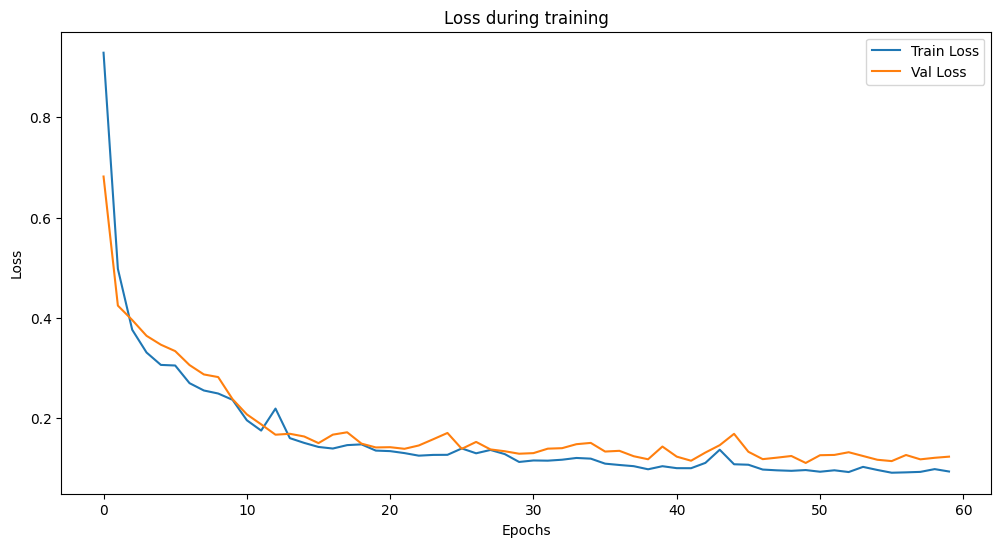

In [292]:
model55 = Sequential()
model55.add(LSTM(120, activation='tanh', input_shape=(X_train55.shape[1], X_train55.shape[2]), return_sequences=True))  
model55.add(LSTM(100, activation='tanh', return_sequences=True)) 
model55.add(LSTM(80, activation='tanh'))
model55.add(Dropout(0.2))
model55.add(Dense(24, activation='linear'))  

print("*"*150)
print("Prédiction de la  consommation de chauffage  en fonction de TEXT+heat+cluster+conso hier test sur toulouse et train sur ses périphéries")
print("*"*150)
history55, loss55, mae55, mse55,rmse55,  mae_test55, mse_test55, rmse_test55,predictions55 = train_and_evaluate(model55, X_train55, y_train55, X_test55, y_test55)

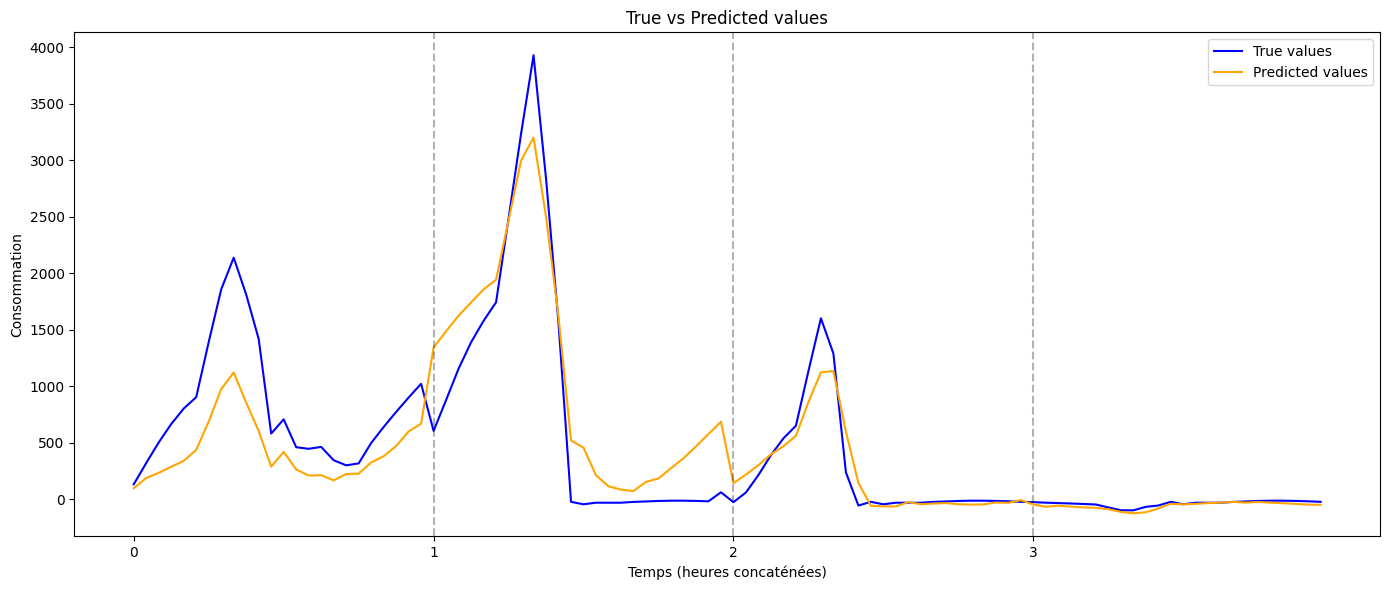

In [483]:
indices = [55, 0, 50, 10]

plot_true_vs_predicted(indices, y_test55, predictions55, scaler_cons)

In [571]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense,Conv2D, MaxPooling2D ,Flatten ,Reshape

In [572]:



Text_conso_24_heat_tou = Text_combined_tou.copy()
Text_conso_24_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_24_heat_tou = pd.concat([Text_conso_24_heat_tou, conso_tou.iloc[:, :-2]], axis=1).reset_index(drop=True)
Text_conso_24_heat_tou.columns = Text_conso_24_heat_tou.columns.astype(str)

df = Text_conso_24_heat_tou.copy()

scaler_temp = StandardScaler()
scaler_cons = StandardScaler()

df_scaled = np.hstack([
    scaler_temp.fit_transform(df.iloc[:, :24]),
    df.iloc[:, 24:25].values,
    scaler_cons.fit_transform(df.iloc[:, 25:])
])

df_final = pd.DataFrame(df_scaled, columns=df.columns)
data = df_final.values

time_steps = 6

X, y = [], []
for i in range(time_steps, len(data)):
    X.append(data[i-time_steps:i])
    y.append(data[i, 25:])
    
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)) 
print("Shape of X:", X.shape)


X_train = X[:int((X.shape[0] * 9) / 10), :]
X_test = X[int((X.shape[0] * 9) / 10):, :]
y_train = y[:int((y.shape[0] * 9) / 10), :]
y_test = y[int((y.shape[0] * 9) / 10):, :]

Shape of X: (1454, 6, 49)
Shape of y: (1454, 24)
Shape of X: (1454, 6, 49, 1)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.7398 - mae: 0.6190 - mse: 0.7398 - val_loss: 0.4156 - val_mae: 0.3975 - val_mse: 0.4156
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4149 - mae: 0.4109 - mse: 0.4149 - val_loss: 0.3793 - val_mae: 0.3702 - val_mse: 0.3793
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.4465 - mae: 0.3930 - mse: 0.4465 - val_loss: 0.3582 - val_mae: 0.3377 - val_mse: 0.3582
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3878 - mae: 0.3553 - mse: 0.3878 - val_loss: 0.3615 - val_mae: 0.3313 - val_mse: 0.3615
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3545 - mae: 0.3443 - mse: 0.3545 - val_loss: 0.3458 - val_mae: 0.3534 - val_mse: 0.3458
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4081 - mae: 0.3665 - mse: 0.4081 - val_loss: 0.3375 - val_mae: 0.3164 - val_mse: 0.3375
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3275 - mae: 0.3255 - mse: 0.3275 - val_loss: 0.328

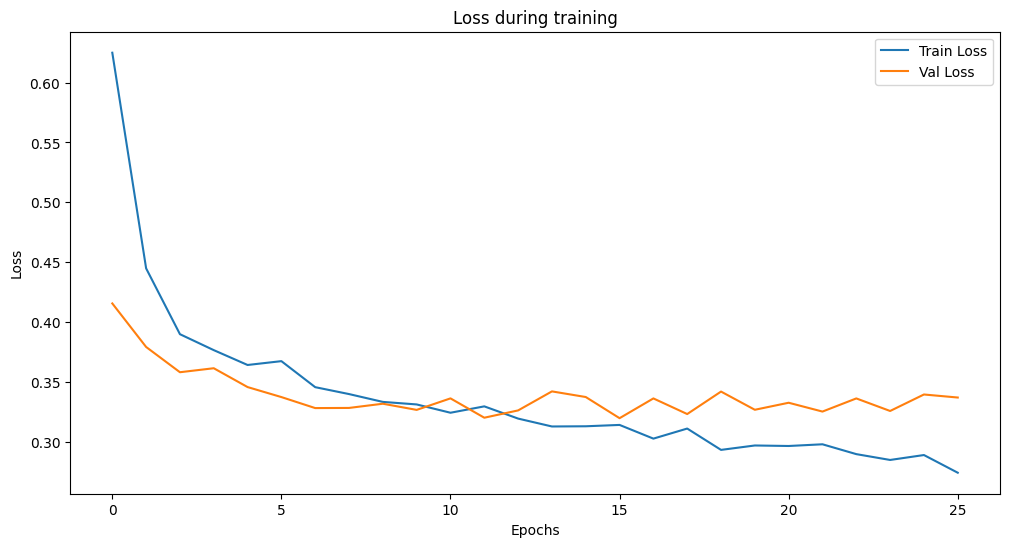

In [574]:
model = Sequential()
model.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Reshape((X_train.shape[1], -1)))
model.add(LSTM(64, activation='tanh'))  
model.add(Dropout(0.2))
model.add(Dense(24, activation='linear'))  

history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, predictions = train_and_evaluate(
    model, X_train, y_train, X_test, y_test)

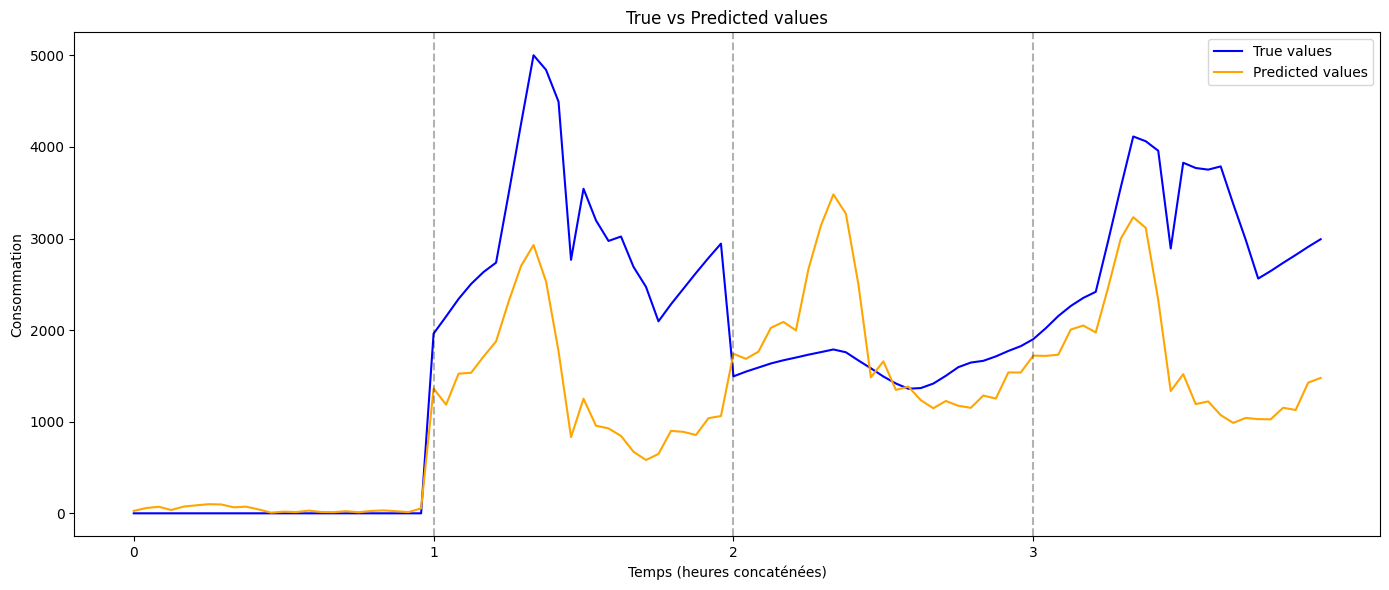

In [575]:
indices = [0, 140, 144, 145]

plot_true_vs_predicted(indices, y_test, predictions, scaler_cons)

In [576]:


Text_conso_24_heat_tou = Text_combined_tou.copy()
Text_conso_24_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_24_heat_tou = pd.concat([Text_conso_24_heat_tou, conso_tou.iloc[:, :-2]], axis=1).reset_index(drop=True)
Text_conso_24_heat_tou.columns = Text_conso_24_heat_tou.columns.astype(str)

df = Text_conso_24_heat_tou.copy()

scaler_temp = StandardScaler()
scaler_cons = StandardScaler()

df_scaled = np.hstack([
    scaler_temp.fit_transform(df.iloc[:, :24]),
    df.iloc[:, 24:25].values,
    scaler_cons.fit_transform(df.iloc[:, 25:])
])

df_final = pd.DataFrame(df_scaled, columns=df.columns)
data = df_final.values

time_steps = 6

X, y = [], []
for i in range(time_steps, len(data)-1):
    seq = data[i - time_steps:i]
    next_temp = data[i + 1, :25]  
    next_temps_repeated = np.tile(next_temp, (time_steps, 1))  
    seq_with_future_temp = np.hstack((seq, next_temps_repeated)) 

    X.append(seq_with_future_temp)
    y.append(data[i, 25:])
    
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)) 


X_train = X[:int((X.shape[0] * 9) / 10), :]
X_test = X[int((X.shape[0] * 9) / 10):, :]
y_train = y[:int((y.shape[0] * 9) / 10), :]
y_test = y[int((y.shape[0] * 9) / 10):, :]



Shape of X: (1453, 6, 74)
Shape of y: (1453, 24)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.8075 - mae: 0.6882 - mse: 0.8075 - val_loss: 0.4054 - val_mae: 0.4328 - val_mse: 0.4054
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4668 - mae: 0.4385 - mse: 0.4668 - val_loss: 0.3551 - val_mae: 0.3491 - val_mse: 0.3551
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3926 - mae: 0.3810 - mse: 0.3926 - val_loss: 0.3400 - val_mae: 0.3602 - val_mse: 0.3400
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3482 - mae: 0.3586 - mse: 0.3482 - val_loss: 0.3331 - val_mae: 0.3184 - val_mse: 0.3331
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3405 - mae: 0.3373 - mse: 0.3405 - val_loss: 0.3359 - val_mae: 0.3268 - val_mse: 0.3359
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3390 - mae: 0.3435 - mse: 0.3390 - val_loss: 0.3269 - val_mae: 0.3153 - val_mse: 0.3269
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2910 - mae: 0.3120 - mse: 0.2910 - val_loss: 0.307

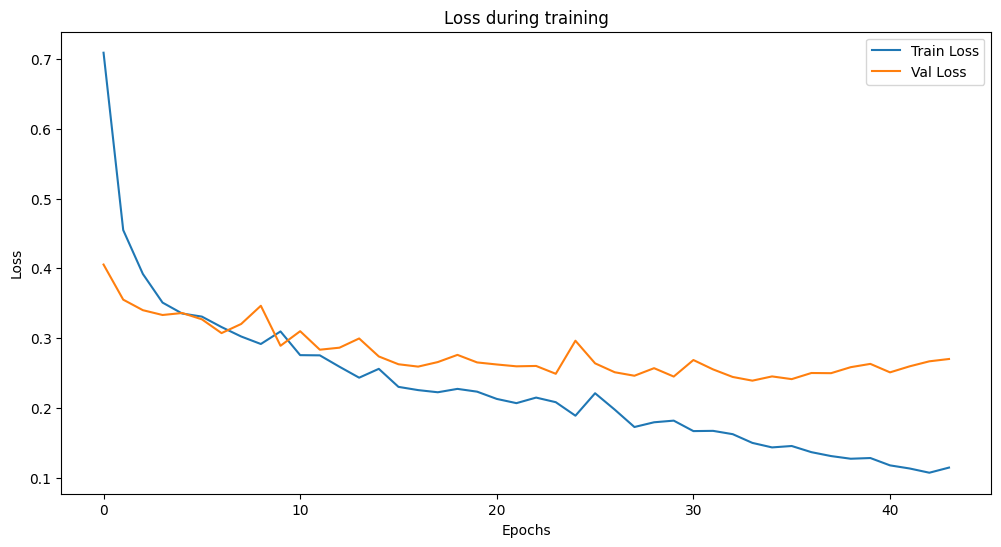

In [577]:
model = Sequential()
model.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Reshape((X_train.shape[1], -1)))
model.add(LSTM(64, activation='tanh'))  
model.add(Dropout(0.2))
model.add(Dense(24, activation='linear'))  

history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, predictions = train_and_evaluate(
    model, X_train, y_train, X_test, y_test)

In [591]:
Text_conso_24_heat_tou=Text_combined_tou.copy()
Text_conso_24_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_24_heat_tou=pd.concat([Text_conso_24_heat_tou,conso_tou.iloc[:,:-2]],axis=1).reset_index(drop=True)
Text_conso_24_heat_tou.columns = Text_conso_24_heat_tou.columns.astype(str)
Text_conso_24_heat_tou=downsample_majority_class(Text_conso_24_heat_tou,'heat_on')



df = Text_conso_24_heat_tou.copy()
scaler_temp = StandardScaler() 
scaler_cons = StandardScaler()

df_scaled = np.hstack([
    scaler_temp.fit_transform(df.iloc[:, :24]),   
    df.iloc[:, 24:25].values,               
    scaler_cons.fit_transform(df.iloc[:, 25:]),  
])

df_final = pd.DataFrame(df_scaled, columns=df.columns)
data = df_final.values  
time_steps = 1  

X, y = [], []
for i in range(1,len(data) ):
    X.append(np.hstack([data[i-1, :], data[i, :24], data[i, 24:25]])) 
    y.append(data[i, 25:]) 
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape) 
print("Shape of y:", y.shape) 

X = X.reshape(X.shape[0],  X.shape[1],1,) 

X_train=X[:int((X.shape[0]*8)/10),:]
X_test=X[int((X.shape[0]*8)/10):,:]
y_train=y[:int((y.shape[0]*8)/10),:]
y_test=y[int((y.shape[0]*8)/10):,:]
print(X_train.shape)
print(X_test.shape)


Shape of X: (1273, 74)
Shape of y: (1273, 24)
(1018, 74, 1)
(255, 74, 1)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.8539 - mae: 0.7089 - mse: 0.8539 - val_loss: 0.5175 - val_mae: 0.5072 - val_mse: 0.5175
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4779 - mae: 0.4851 - mse: 0.4779 - val_loss: 0.4464 - val_mae: 0.4324 - val_mse: 0.4464
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4080 - mae: 0.4247 - mse: 0.4080 - val_loss: 0.4265 - val_mae: 0.4102 - val_mse: 0.4265
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3966 - mae: 0.4100 - mse: 0.3966 - val_loss: 0.4194 - val_mae: 0.4048 - val_mse: 0.4194
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3658 - mae: 0.3937 - mse: 0.3658 - val_loss: 0.4306 - val_mae: 0.3951 - val_mse: 0.4306
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3391 - mae: 0.3793 - mse: 0.3391 - val_loss: 0.4066 - val_mae: 0.3838 - val_mse: 0.4066
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3197 - mae: 0.3582 - mse: 0.3197 - val

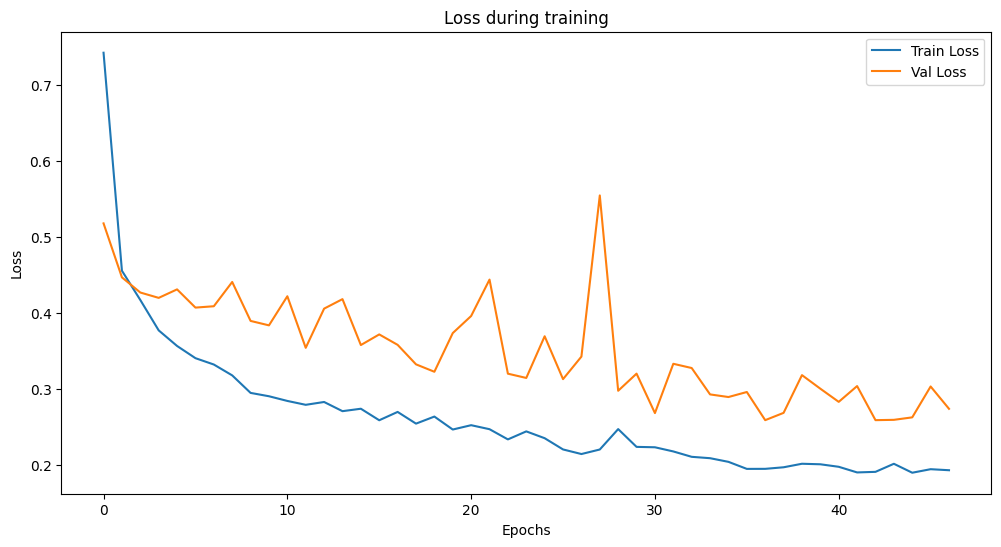

In [593]:
model = Sequential()
model.add(Conv1D(filters=120, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))  
model.add(Dropout(0.2))
model.add(Dense(24, activation='linear'))  

history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, predictions = train_and_evaluate(
    model, X_train, y_train, X_test, y_test)

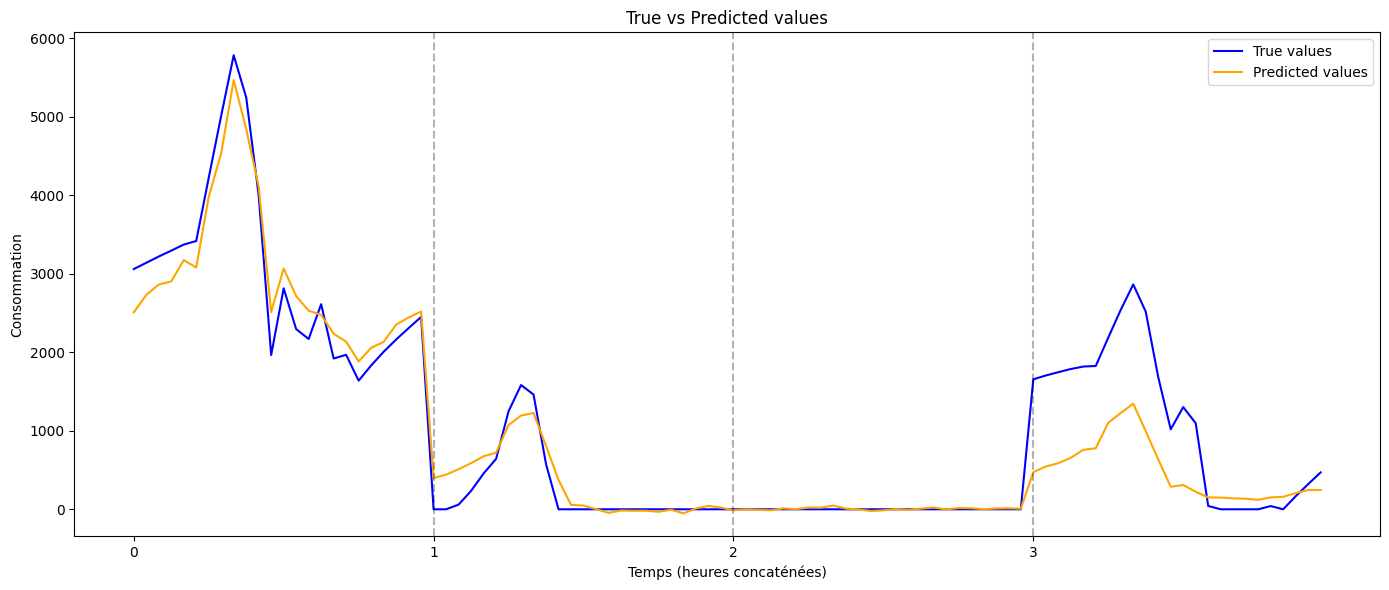

In [594]:
indices = [5, 250, 50, 100]

plot_true_vs_predicted(indices, y_test, predictions, scaler_cons)